In [2]:
import pandas as pd
import numpy as np

In [5]:
mrfstock_data = pd.read_csv('MRF Weekly Stock Prices Data 1st July 2002 to 2nd Feb 2024.csv')
mrfstock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.0,935.0,880.0,927.299988,840.357666,3286.0
1,2002-07-08,930.0,934.0,885.0,896.500000,812.445374,4633.0
2,2002-07-15,900.0,925.0,867.0,907.450012,822.368896,4097.0
3,2002-07-22,898.0,901.0,852.0,881.700012,799.033142,2906.0
4,2002-07-29,884.0,928.0,852.0,889.400024,806.011108,6617.0


In [12]:
import pandas as pd

# Assuming mrfstock_data is your DataFrame

# Selecting only the 'Date', 'Open', and 'Close' columns
mrfstock_data = mrfstock_data[['Date', 'Open', 'Close']]

# Converting the 'Date' column to datetime format
mrfstock_data['Date'] = pd.to_datetime(mrfstock_data['Date'].apply(lambda x: x.split()[0]))

# Setting the 'Date' column as the index
mrfstock_data.set_index('Date', drop=True, inplace=True)

# Displaying the first few rows of the DataFrame
print(mrfstock_data.head())

             Open       Close
Date                         
2002-07-01  910.0  927.299988
2002-07-08  930.0  896.500000
2002-07-15  900.0  907.450012
2002-07-22  898.0  881.700012
2002-07-29  884.0  889.400024


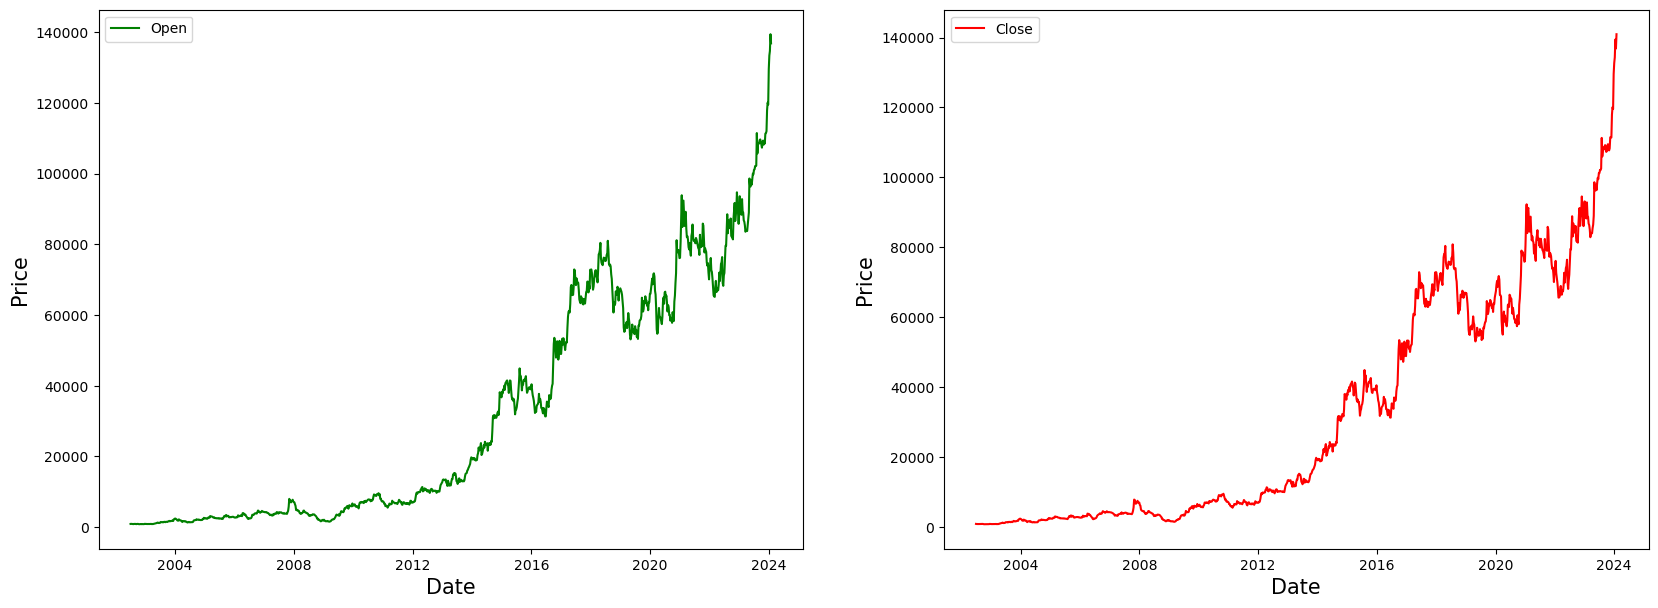

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(mrfstock_data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

ax[1].plot(mrfstock_data['Close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(mrfstock_data)

In [19]:
mrfstock_data[mrfstock_data.columns] = scaled_data

In [20]:
# Determine the training size
training_size = round(len(mrfstock_data) * 0.80)

# Split the data into training and test sets
train_data = mrfstock_data[:training_size]
test_data = mrfstock_data[training_size:]

In [22]:
import numpy as np

def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx].values)
        labels.append(dataset.iloc[stop_idx].values)
        start_idx += 1

    return (np.array(sequences), np.array(labels))

In [23]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy

In [27]:
from tensorflow.compat.v1 import get_default_graph
from tensorflow.compat.v1.train import Optimizer

# Create a Sequential model
model = Sequential()

# Add LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))

# Add dropout regularization
model.add(Dropout(0.1))

# Add another LSTM layer with 50 units
model.add(LSTM(units=50))

# Add a Dense layer with 2 units for output
model.add(Dense(2))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80


27/27 [==============================] - 5s 52ms/step - loss: 0.0068 - mean_absolute_error: 0.0520 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/80
27/27 [==============================] - 1s 27ms/step - loss: 6.2059e-04 - mean_absolute_error: 0.0159 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/80
27/27 [==============================] - 1s 24ms/step - loss: 4.4434e-04 - mean_absolute_error: 0.0127 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/80
27/27 [==============================] - 1s 24ms/step - loss: 4.0154e-04 - mean_absolute_error: 0.0121 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/80
27/27 [==============================] - 1s 25ms/step - loss: 4.2858e-04 - mean_absolute_error: 0.0124 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/80
27/27 [==============================] - 1s 24ms/step - loss: 4.6229e-04 - mean_absolute_error: 0.0131 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/80
27/27 [==================

In [29]:
test_predicted = model.predict(test_seq)

6/6 [==============================] - 1s 9ms/step


In [32]:
# Define MinMaxScaler and fit it to your training data before transformation
MMS = MinMaxScaler()
MMS.fit(train_data)  # Using train_data as your training data

MinMaxScaler()

In [33]:
# Inverse transform the predicted values
test_predicted = model.predict(test_seq)
test_inverse_predicted = MMS.inverse_transform(test_predicted)

6/6 [==============================] - 0s 8ms/step


In [43]:
# Merging actual and predicted data for better visualization
num_rows = min(len(mrfstock_data), len(test_inverse_predicted))
gs_slic_data = pd.concat([mrfstock_data.iloc[-num_rows:].copy(), 
                          pd.DataFrame(test_inverse_predicted[-num_rows:], 
                                       columns=['open_predicted', 'close_predicted'], 
                                       index=mrfstock_data.index[-num_rows:])], axis=1)

print(gs_slic_data.head())  # Check the concatenated data

                Open     Close  open_predicted  close_predicted
Date                                                           
2020-09-28  0.411054  0.426402        0.246905         0.241853
2020-10-05  0.432698  0.413602        0.250072         0.244804
2020-10-12  0.421862  0.408093        0.251019         0.245735
2020-10-19  0.414669  0.448106        0.249003         0.243871
2020-10-26  0.454342  0.460127        0.256455         0.250784


In [45]:
# Inverse transform the 'open' and 'close' columns back to their original scale
gs_slic_data[['Open', 'Close']] = MMS.inverse_transform(gs_slic_data[['Open', 'Close']])

In [46]:
# Display the head of the DataFrame
print(gs_slic_data.head())

                Open     Close  open_predicted  close_predicted
Date                                                           
2020-09-28  0.237762  0.243547        0.246905         0.241853
2020-10-05  0.250281  0.236236        0.250072         0.244804
2020-10-12  0.244013  0.233089        0.251019         0.245735
2020-10-19  0.239853  0.255943        0.249003         0.243871
2020-10-26  0.262801  0.262809        0.256455         0.250784


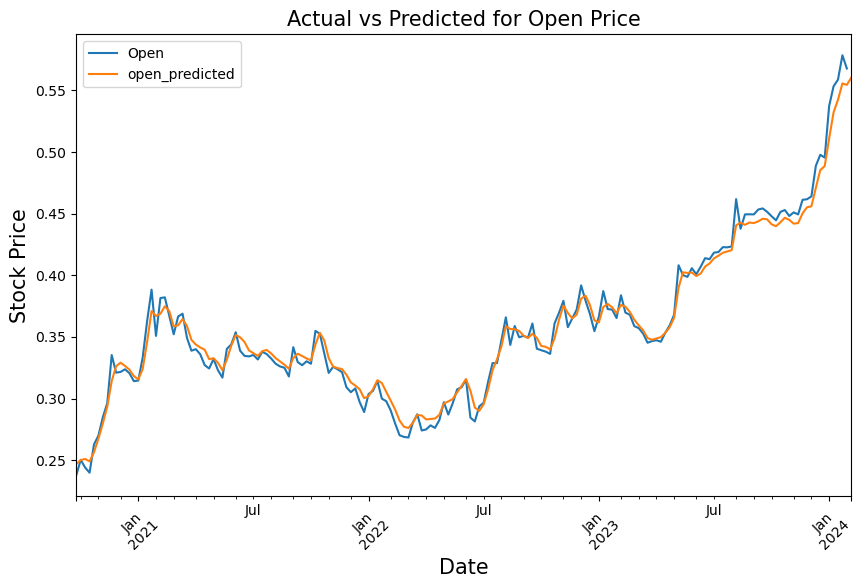

                Open     Close  open_predicted  close_predicted
Date                                                           
2020-09-28  0.237762  0.243547        0.246905         0.241853
2020-10-05  0.250281  0.236236        0.250072         0.244804
2020-10-12  0.244013  0.233089        0.251019         0.245735
2020-10-19  0.239853  0.255943        0.249003         0.243871
2020-10-26  0.262801  0.262809        0.256455         0.250784


In [48]:
# Plotting 'open' and 'open_predicted' columns
gs_slic_data[['Open', 'open_predicted']].plot(figsize=(10, 6))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis label
plt.xlabel('Date', size=15)

# Set y-axis label
plt.ylabel('Stock Price', size=15)

# Set plot title
plt.title('Actual vs Predicted for Open Price', size=15)

# Show the plot
plt.show()

# Display the head of the DataFrame after inverse transformation
print(gs_slic_data.head())

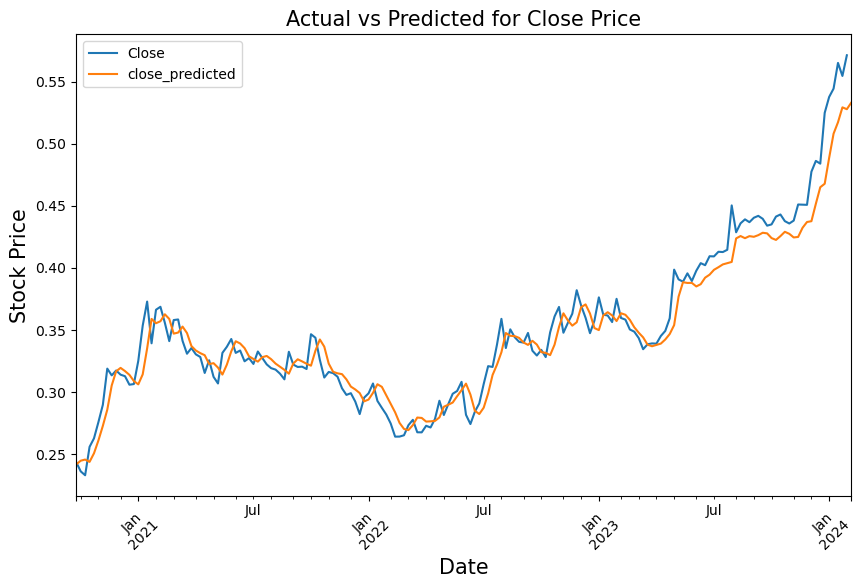

In [49]:
# Plotting 'close' and 'close_predicted' columns
gs_slic_data[['Close', 'close_predicted']].plot(figsize=(10, 6))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis label
plt.xlabel('Date', size=15)

# Set y-axis label
plt.ylabel('Stock Price', size=15)

# Set plot title
plt.title('Actual vs Predicted for Close Price', size=15)

# Show the plot
plt.show()

In [50]:
## Trying to get future predictions

In [75]:
# Generate predictions for the next 10 weeks
future_predictions = model.predict(test_seq[-10:])  # Assuming test_seq contains enough data for prediction

1/1 [==============================] - 0s 22ms/step


In [76]:
# Create a list of future dates for the next 10 weeks
future_dates = pd.date_range(start='2024-02-18', periods=10, freq='W')

In [77]:
# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, columns=['open_predicted', 'close_predicted'], index=future_dates)

In [78]:
# Print the DataFrame to verify
print(future_df)

            open_predicted  close_predicted
2024-02-18        0.788248         0.766168
2024-02-25        0.814133         0.790657
2024-03-03        0.838996         0.814050
2024-03-10        0.844589         0.818937
2024-03-17        0.883264         0.855300
2024-03-24        0.919874         0.889478
2024-03-31        0.937606         0.905561
2024-04-07        0.960507         0.926585
2024-04-14        0.958468         0.923996
2024-04-21        0.968595         0.933269


In [79]:
# Define MinMaxScaler and fit it to your training data before transformation
MMS = MinMaxScaler()
MMS.fit(train_data)  # Using train_data as your training data

MinMaxScaler()

In [80]:
# Inverse transform the predicted values
test_predicted = model.predict(test_seq)
test_inverse_predicted = MMS.inverse_transform(test_predicted)

6/6 [==============================] - 0s 9ms/step


In [81]:
# Merging actual and predicted data for better visualization
num_rows = min(len(mrfstock_data), len(test_inverse_predicted))
gs_slic_data = pd.concat([mrfstock_data.iloc[-num_rows:].copy(), 
                          pd.DataFrame(test_inverse_predicted[-num_rows:], 
                                       columns=['open_predicted', 'close_predicted'], 
                                       index=mrfstock_data.index[-num_rows:])], axis=1)

print(gs_slic_data.head())  # Check the concatenated data

                Open     Close  open_predicted  close_predicted
Date                                                           
2020-09-28  0.411054  0.426402        0.246905         0.241853
2020-10-05  0.432698  0.413602        0.250072         0.244804
2020-10-12  0.421862  0.408093        0.251019         0.245735
2020-10-19  0.414669  0.448106        0.249003         0.243871
2020-10-26  0.454342  0.460127        0.256455         0.250784


In [82]:
# Inverse transform the 'open' and 'close' columns back to their original scale
gs_slic_data[['Open', 'Close']] = MMS.inverse_transform(gs_slic_data[['Open', 'Close']])

In [83]:
# Display the head of the DataFrame
print(gs_slic_data.head())

                Open     Close  open_predicted  close_predicted
Date                                                           
2020-09-28  0.237762  0.243547        0.246905         0.241853
2020-10-05  0.250281  0.236236        0.250072         0.244804
2020-10-12  0.244013  0.233089        0.251019         0.245735
2020-10-19  0.239853  0.255943        0.249003         0.243871
2020-10-26  0.262801  0.262809        0.256455         0.250784


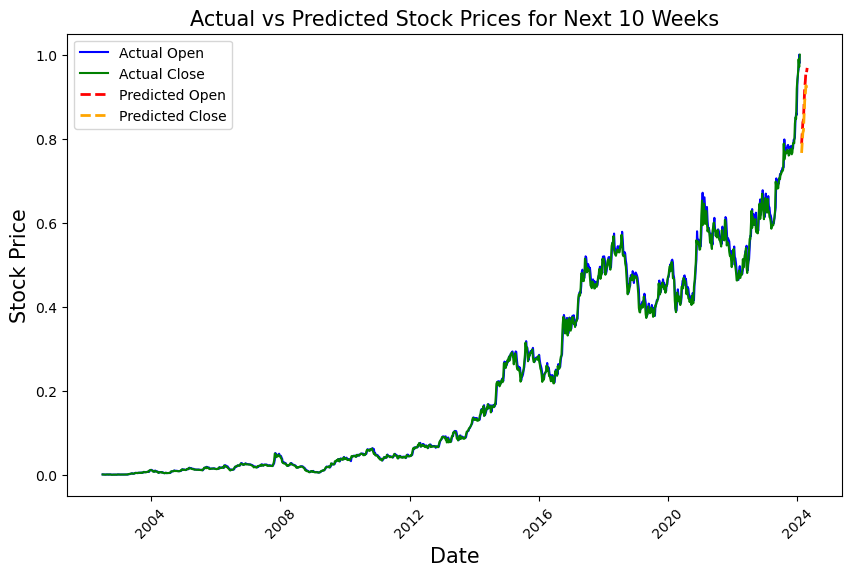

            open_predicted  close_predicted
2024-02-18        0.788248         0.766168
2024-02-25        0.814133         0.790657
2024-03-03        0.838996         0.814050
2024-03-10        0.844589         0.818937
2024-03-17        0.883264         0.855300
2024-03-24        0.919874         0.889478
2024-03-31        0.937606         0.905561
2024-04-07        0.960507         0.926585
2024-04-14        0.958468         0.923996
2024-04-21        0.968595         0.933269


In [88]:
# Plot the actual and predicted stock prices for open and close prices
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(mrfstock_data.index, mrfstock_data['Open'], label='Actual Open', color='blue')
plt.plot(mrfstock_data.index, mrfstock_data['Close'], label='Actual Close', color='green')

# Plot future predictions
plt.plot(future_df.index, future_df['open_predicted'], label='Predicted Open', linestyle='--', color='red', linewidth=2)
plt.plot(future_df.index, future_df['close_predicted'], label='Predicted Close', linestyle='--', color='orange', linewidth=2)

# Set plot labels and title
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted Stock Prices for Next 10 Weeks', size=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()

# Display the DataFrame containing future predictions
print(future_df)

In [89]:
## ARIMA

In [90]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


                                              0.0/614.7 kB ? eta -:--:--
     ------------                           194.6/614.7 kB 2.4 MB/s eta 0:00:01
     ---------------------                  348.2/614.7 kB 2.7 MB/s eta 0:00:01
     -------------------------------        501.8/614.7 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 614.7/614.7 kB 3.2 MB/s eta 0:00:00
                                              0.0/2.8 MB ? eta -:--:--
     ---                                      0.2/2.8 MB 5.0 MB/s eta 0:00:01
     ------                                   0.5/2.8 MB 4.9 MB/s eta 0:00:01
     ---------                                0.6/2.8 MB 5.0 MB/s eta 0:00:01
     -------------                            0.9/2.8 MB 4.8 MB/s eta 0:00:01
     ---------------                          1.1/2.8 MB 4.6 MB/s eta 0:00:01
     ------------------                       1.3/2.8 MB 4.9 MB/s eta 0:00:01
     ----------------------                   1.6/2.8 MB 4.6 MB/s et

In [91]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [92]:
stock_data = pd.read_csv("MRF Weekly Stock Prices Data 1st July 2002 to 2nd Feb 2024.csv")
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.000000,935.000000,880.000000,927.299988,840.357666,3286.0
1,2002-07-08,930.000000,934.000000,885.000000,896.500000,812.445374,4633.0
2,2002-07-15,900.000000,925.000000,867.000000,907.450012,822.368896,4097.0
3,2002-07-22,898.000000,901.000000,852.000000,881.700012,799.033142,2906.0
4,2002-07-29,884.000000,928.000000,852.000000,889.400024,806.011108,6617.0
...,...,...,...,...,...,...,...
1123,2024-01-08,133401.000000,134639.906250,130210.000000,134351.093750,134351.093750,30981.0
1124,2024-01-15,134699.000000,150254.156250,133650.046875,139431.953125,139431.953125,78081.0
1125,2024-01-22,139431.953125,147849.796875,136105.250000,136857.953125,136857.953125,52939.0
1126,2024-01-29,136857.156250,144750.000000,136333.046875,140941.843750,140941.843750,76025.0


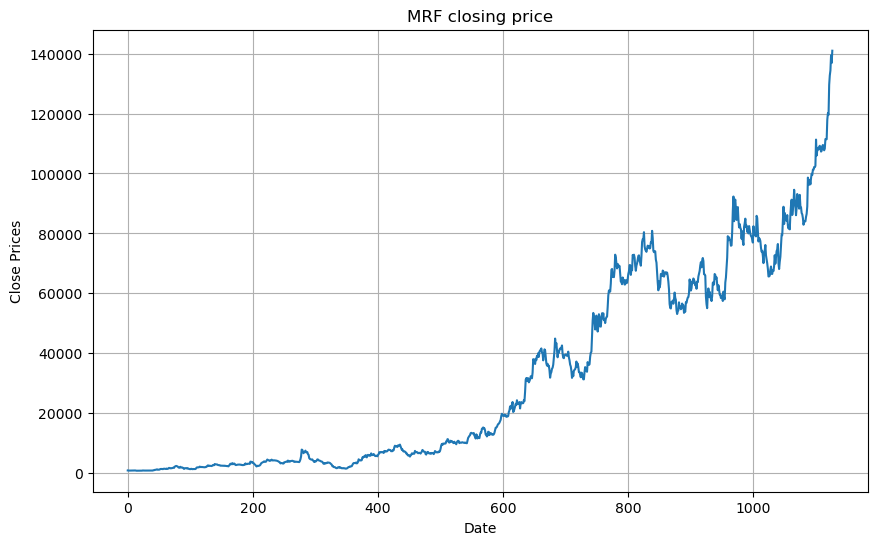

In [94]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('MRF closing price')
plt.show()

<Axes: ylabel='Density'>

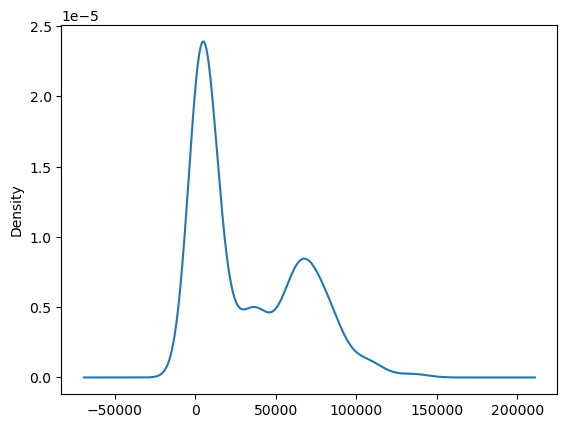

In [95]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

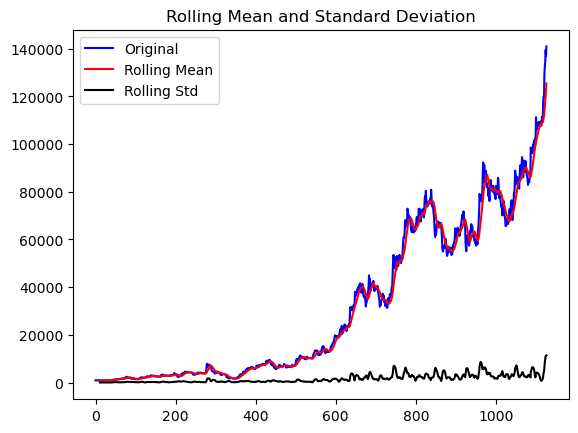

Results of dickey fuller test
Test Statistics                        NaN
p-value                                NaN
No. of lags used                  0.000000
Number of observations used    1127.000000
critical value (1%)              -3.436166
critical value (5%)              -2.864108
critical value (10%)             -2.568137
dtype: float64


In [96]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

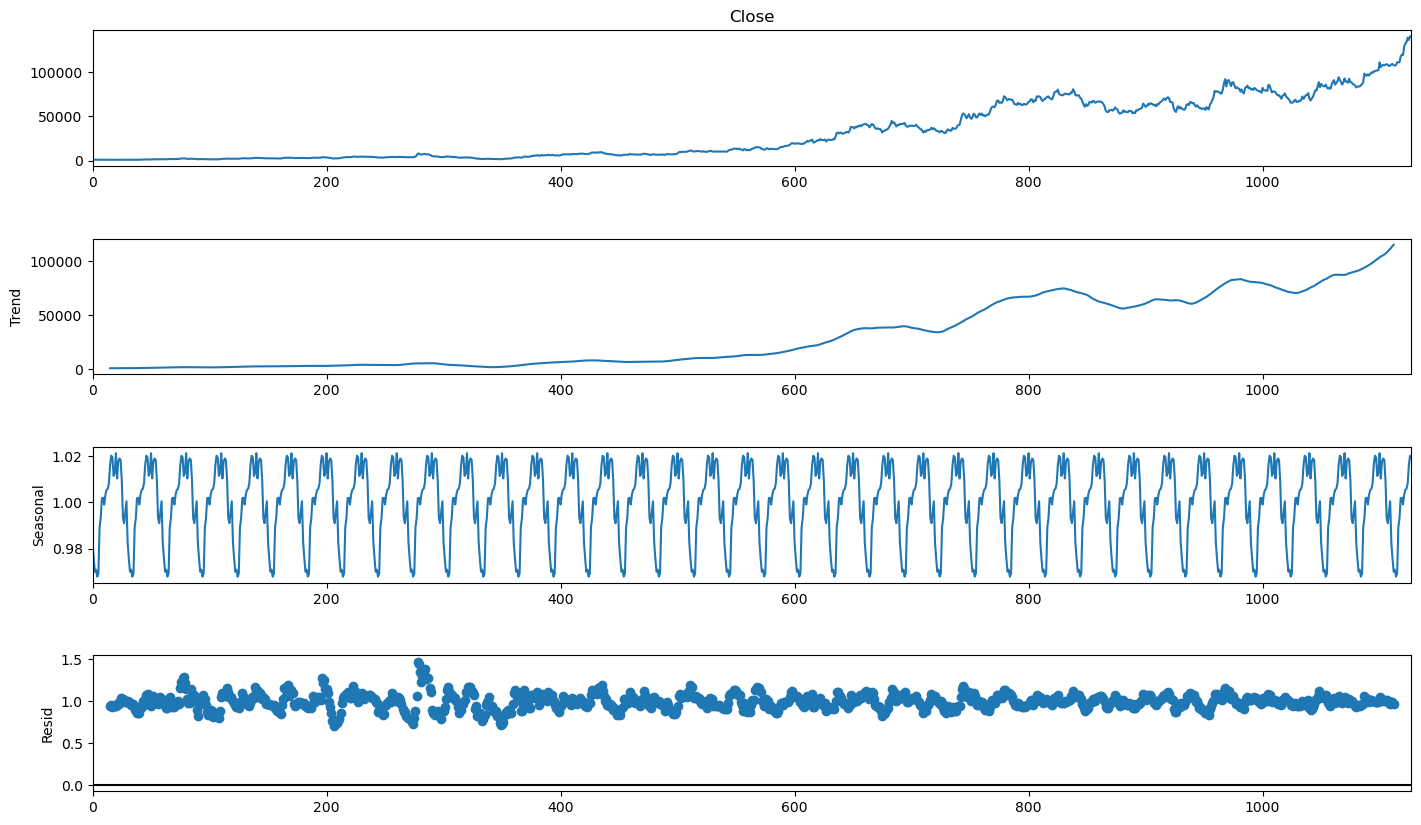

In [99]:
# Fill missing values using linear interpolation
df_close_filled = df_close.interpolate(method='linear')

# Perform seasonal decomposition
result = seasonal_decompose(df_close_filled, model='multiplicative', period=30)

# Plot the decomposition
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


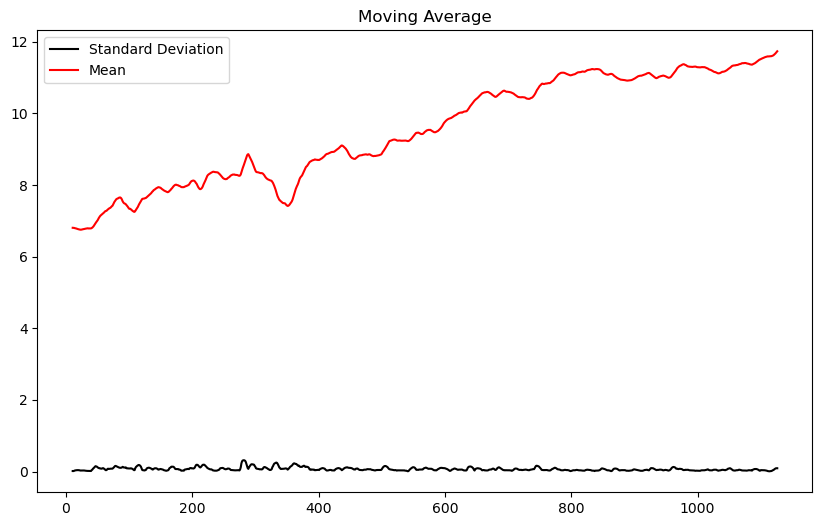

In [100]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

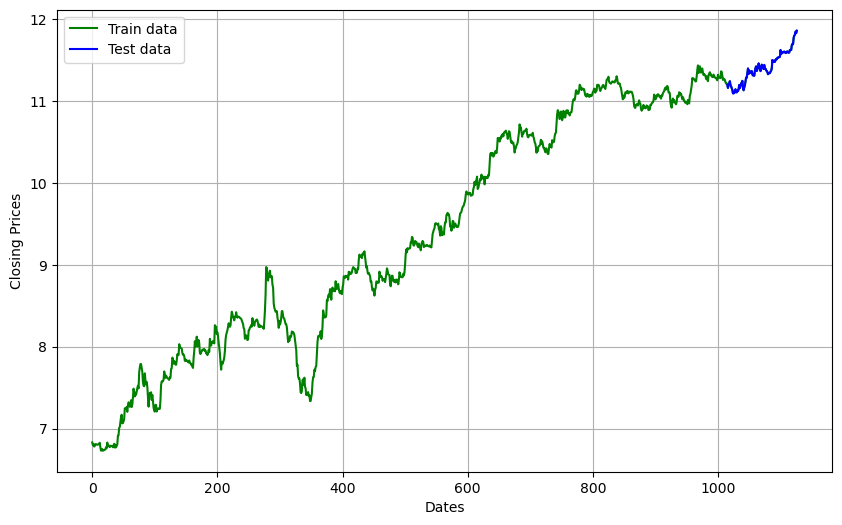

In [101]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3184.589, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3196.462, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3195.155, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3178.842, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3196.486, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3194.559, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3194.657, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3196.491, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3194.351, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3196.485, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3192.491, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3193.317, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.389 seconds
                               SARIMAX Results                              

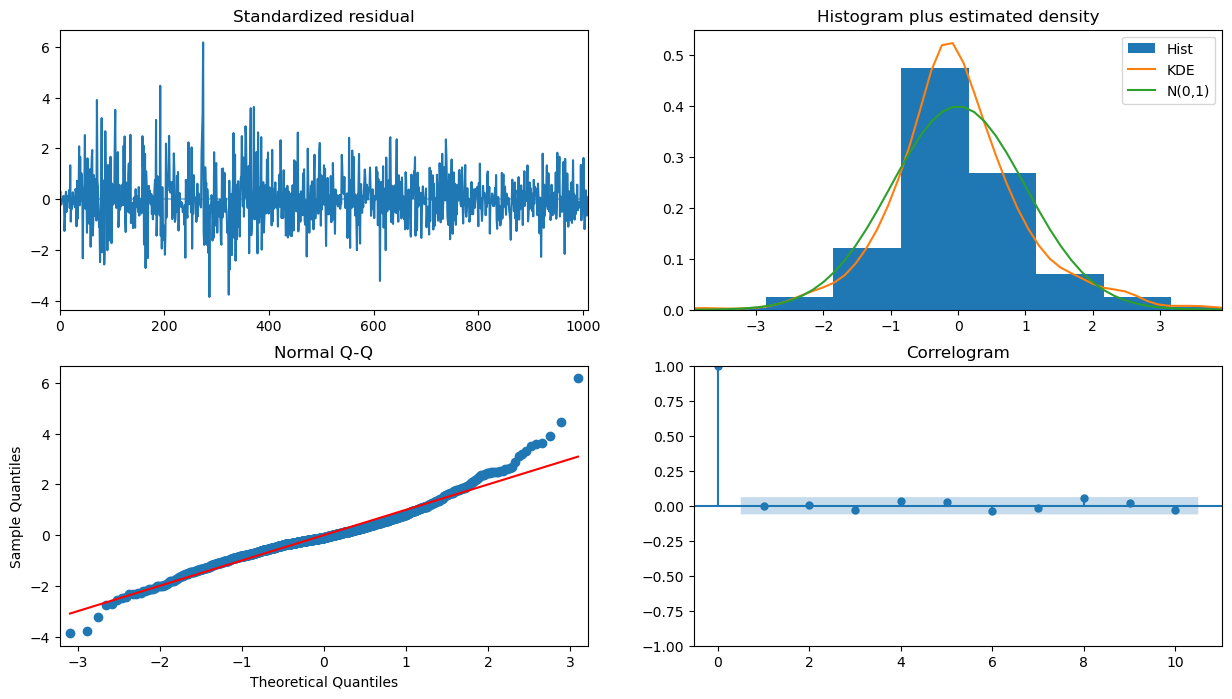

In [102]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [107]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1012
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1599.798
Date:                Fri, 16 Feb 2024   AIC                          -3191.596
Time:                        20:10:16   BIC                          -3171.921
Sample:                             0   HQIC                         -3184.122
                               - 1012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6996      0.227      3.078      0.002       0.254       1.145
ma.L1         -0.5846      0.228     -2.565      0.010      -1.031      -0.138
ma.L2         -0.0279      0.048     -0.582      0.5

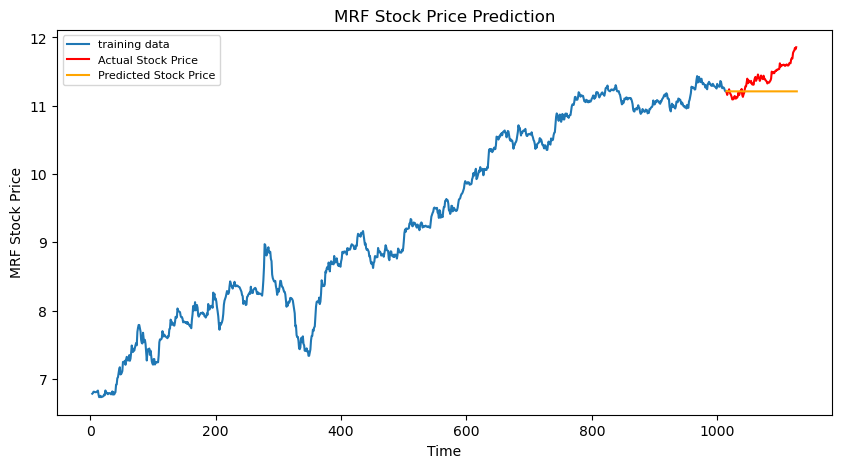

In [112]:
# Forecast
n_forecast_steps = 321
fc = fitted.forecast(steps=n_forecast_steps)
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color='red', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.title('MRF Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MRF Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [119]:
# Remove NaN values from test_data and fc
test_data_clean = test_data[~np.isnan(test_data)]
fc_clean = fc[~np.isnan(test_data)]

# Calculate performance metrics
mse = mean_squared_error(test_data_clean, fc_clean)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_clean, fc_clean)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_clean, fc_clean))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_clean - test_data_clean)/np.abs(test_data_clean))
print('MAPE: '+str(mape))

MSE: 0.0717012399641939
MAE: 0.21621256807363268
RMSE: 0.2677708721354769
MAPE: 0.01875504104519466


In [120]:
# Calculate performance metrics
mse = mean_squared_error(test_data_clean, fc_clean)
print('MSE: {:.2f}'.format(mse))

mae = mean_absolute_error(test_data_clean, fc_clean)
print('MAE: {:.2f}'.format(mae))

rmse = math.sqrt(mean_squared_error(test_data_clean, fc_clean))
print('RMSE: {:.2f}'.format(rmse))

mape = np.mean(np.abs(fc_clean - test_data_clean)/np.abs(test_data_clean)) * 100
print('MAPE: {:.2f}%'.format(mape))

MSE: 0.07
MAE: 0.22
RMSE: 0.27
MAPE: 1.88%
